#### task 4.1
f. engagement score to each user. Consider the engagement score as the Euclidean 
distance between the user data point & the less engaged cluster (use the first clustering 
for this) (Euclidean Distance)



In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

# Load the dataset
df = pd.read_csv('telcom_data1.csv')
df


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,04-04-19 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.310000e+19,04-09-19 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.310000e+19,04-09-19 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.310000e+19,04-10-19 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.310000e+19,04-12-19 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.280000e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.350000e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.310000e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.310000e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [2]:
#Calculate the engagement metrics
df['sessions_frequency'] = df.groupby('MSISDN/Number')['Dur. (ms)'].transform('count')
df['duration_of_session'] = df['Dur. (ms)']
df['session_total_traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),sessions_frequency,duration_of_session,session_total_traffic
0,1.310000e+19,04-04-19 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,2.0,1823652.0,345629377.0
1,1.310000e+19,04-09-19 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,2.0,1365104.0,707185356.0
2,1.310000e+19,04-09-19 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.0,1361762.0,307690973.0
3,1.310000e+19,04-10-19 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.0,1321509.0,889352748.0
4,1.310000e+19,04-12-19 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.0,1089009.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.280000e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,1.0,81230.0,631804110.0
149997,7.350000e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,2.0,97970.0,705783925.0
149998,1.310000e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.0,98249.0,627698629.0
149999,1.310000e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.0,97910.0,401522016.0


In [3]:
# Aggregate the engagement metrics per customer id (MSISDN)
engagement_metrics = df.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'session_total_traffic': 'sum'})
engagement_metrics.columns = ['Sessions Frequency', 'Session Duration', 'Session Total Traffic']
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic
MSISDN/Number,,,
3.360100e+10,1,116720.0,8.786906e+08
3.360100e+10,1,181230.0,1.568596e+08
3.360100e+10,1,134969.0,5.959665e+08
3.360101e+10,1,49878.0,4.223207e+08
3.360101e+10,2,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1,8810.0,7.146416e+08
3.379000e+10,1,140988.0,4.803073e+08
3.197020e+12,1,877385.0,2.321240e+08


In [4]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
from sklearn.cluster import KMeans
kmeans=KMeans()


In [5]:
engagement_metrics['Sessions Frequency']=mms.fit_transform(engagement_metrics[['Sessions Frequency']])
engagement_metrics['Session Duration']=mms.fit_transform(engagement_metrics[['Session Duration']])
engagement_metrics['Session Total Traffic']=mms.fit_transform(engagement_metrics[['Session Total Traffic']])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

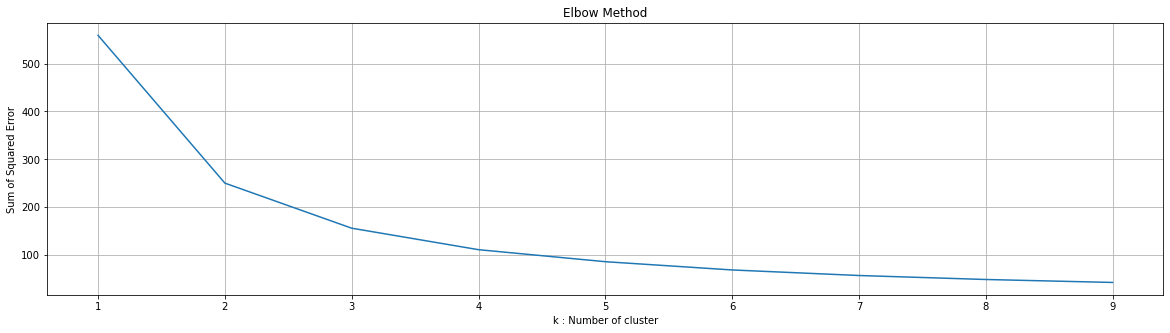

In [7]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))
# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(engagement_metrics)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [8]:
df1=engagement_metrics[['Sessions Frequency','Session Duration','Session Total Traffic']].values

In [9]:
# Run a k-means (k=2) to classify customers into two groups of engagement
kmeans = KMeans(n_clusters=2,max_iter=1000)
kmeans.fit(df1)


KMeans(max_iter=1000, n_clusters=2)

In [10]:
cluster = kmeans.cluster_centers_

In [11]:
cluster

array([[0.06175697, 0.00571687, 0.05514413],
       [0.14895296, 0.01575592, 0.16509764]])

In [12]:
labels=kmeans.labels_

In [13]:
centroids=np.array(cluster)

In [14]:
cluster_labels = kmeans.labels_

In [15]:
cluster_centers=np.array(cluster)
cluster_centers

array([[0.06175697, 0.00571687, 0.05514413],
       [0.14895296, 0.01575592, 0.16509764]])

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
distances=euclidean_distances(df1,centroids)

In [17]:
less_engaged_cluster_index =0

In [18]:
engagement_score = distances[:,less_engaged_cluster_index]
engagement_score =mms.fit_transform(engagement_score.reshape(-1,1))

In [19]:
engagement_score


array([[0.02187568],
       [0.02218038],
       [0.0028406 ],
       ...,
       [0.02913726],
       [0.00430842],
       [0.03337929]])

In [20]:
engagement_metrics['engagement_score']=engagement_score
engagement_metrics

,Sessions Frequency,Session Duration,Session Total Traffic,engagement_score
MSISDN/Number,,,,
3.360100e+10,0.055556,0.005908,0.095931,0.021876
3.360100e+10,0.055556,0.009387,0.014026,0.022180
3.360100e+10,0.055556,0.006892,0.063851,0.002841
3.360101e+10,0.055556,0.002304,0.044148,0.004291
3.360101e+10,0.111111,0.001615,0.161598,0.069399
...,...,...,...,...
3.379000e+10,0.055556,0.000090,0.077317,0.010920
3.379000e+10,0.055556,0.007217,0.050727,0.000972
3.197020e+12,0.055556,0.046922,0.022566,0.029137


g. experience score for each user. Consider the experience score as the Euclidean distance
between the user data point & the worst experience cluster.

In [21]:
# User Experience Analysis
# Compute the average TCP retransmission, average RTT, handset type, and average throughput per customer
df['TCP Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
tcp_retransmission = df.groupby('MSISDN/Number')['TCP Retransmission'].mean()

df['RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
rtt = df.groupby('MSISDN/Number')['RTT'].mean()

handset_type = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode())
# Calculate the average throughput
df['avg_throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['avg_throughput']
throughput = df.groupby('MSISDN/Number')['avg_throughput'].mean()

experience_metrics = pd.concat([tcp_retransmission, rtt, throughput], axis=1)
experience_metrics.columns = ['TCP Retransmission', 'RTT', 'Throughput']
experience_metrics

,TCP Retransmission,RTT,Throughput
MSISDN/Number,,,
3.360100e+10,NaN,23.00,38.0
3.360100e+10,NaN,15.50,49.5
3.360100e+10,NaN,NaN,48.5
3.360101e+10,NaN,42.00,124.0
3.360101e+10,9370832.0,29.75,14211.0
...,...,...,...
3.379000e+10,218045.0,26.00,5182.5
3.379000e+10,NaN,20.00,58.0
3.197020e+12,NaN,NaN,0.5


In [22]:
# Check for missing values
print(experience_metrics.isnull().sum())



TCP Retransmission    67565
RTT                   18544
Throughput                0
dtype: int64


In [23]:
# Fill missing values with the mean of the column
experience_metrics.fillna(experience_metrics.mean(), inplace=True)


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
mms = MinMaxScaler()

# Scale the 'TCP Retransmission', 'RTT', and 'Throughput' columns
experience_metrics[['TCP Retransmission', 'RTT', 'Throughput']] = mms.fit_transform(experience_metrics[['TCP Retransmission', 'RTT', 'Throughput']])
experience_metrics

,TCP Retransmission,RTT,Throughput
MSISDN/Number,,,
3.360100e+10,0.004919,0.000475,0.000268
3.360100e+10,0.004919,0.000320,0.000349
3.360100e+10,0.004919,0.001396,0.000342
3.360101e+10,0.004919,0.000867,0.000873
3.360101e+10,0.002178,0.000614,0.100102
...,...,...,...
3.379000e+10,0.000051,0.000537,0.036505
3.379000e+10,0.004919,0.000413,0.000409
3.197020e+12,0.004919,0.001396,0.000004


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

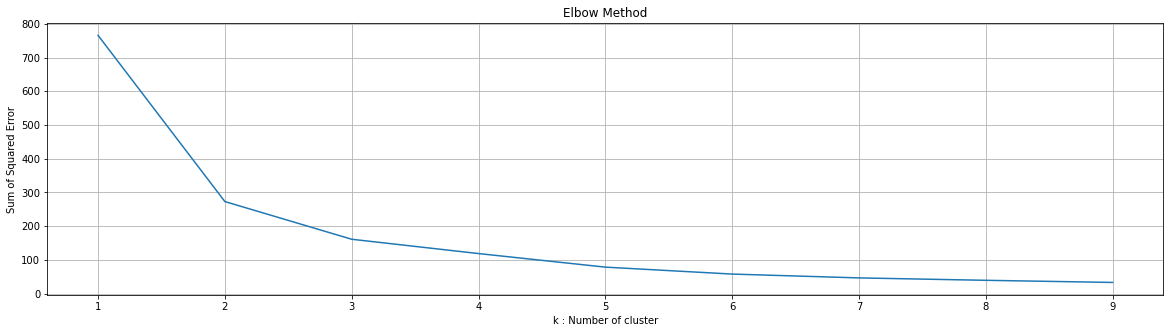

In [26]:
sse = {};
kmax = 10
fig = plt.subplots(figsize = (20,5))
# Elbow Method :
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(experience_metrics)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [27]:
df2= experience_metrics[['TCP Retransmission', 'RTT', 'Throughput']] 

In [28]:

from sklearn.cluster import KMeans



In [29]:
# Run a k-means (k=2) to classify customers into two groups of engagement
kmeans = KMeans(n_clusters=2)
kmeans.fit(df2)
df2['Cluster'] = kmeans.labels_
df2['Cluster']


MSISDN/Number
3.360100e+10    0
3.360100e+10    0
3.360100e+10    0
3.360101e+10    0
3.360101e+10    0
               ..
3.379000e+10    0
3.379000e+10    0
3.197020e+12    0
3.370000e+14    0
8.823970e+14    0
Name: Cluster, Length: 106856, dtype: int32

In [30]:
cluster=kmeans.cluster_centers_

In [31]:
cluster

array([[0.00403154, 0.00146611, 0.01538239],
       [0.00919159, 0.00106128, 0.19527891]])

In [32]:
labels=kmeans.labels_

In [33]:
centroids=np.array(cluster)

In [34]:
cluster_labels = kmeans.labels_

In [35]:
cluster_centers=np.array(cluster)
cluster_centers

array([[0.00403154, 0.00146611, 0.01538239],
       [0.00919159, 0.00106128, 0.19527891]])

In [36]:
from sklearn.metrics.pairwise import euclidean_distances
distances=euclidean_distances(df1,centroids)

In [37]:
worst_experience_cluster_center=1

In [38]:
experience_score = distances[:,worst_experience_cluster_center]
experience_score =mms.fit_transform(experience_score.reshape(-1,1))

In [39]:
experience_score

array([[0.04674043],
       [0.09742615],
       [0.06618709],
       ...,
       [0.09568756],
       [0.06643321],
       [0.10210025]])

In [40]:
experience_metrics['experience_score']=experience_score
experience_metrics

,TCP Retransmission,RTT,Throughput,experience_score
MSISDN/Number,,,,
3.360100e+10,0.004919,0.000475,0.000268,0.046740
3.360100e+10,0.004919,0.000320,0.000349,0.097426
3.360100e+10,0.004919,0.001396,0.000342,0.066187
3.360101e+10,0.004919,0.000867,0.000873,0.078346
3.360101e+10,0.002178,0.000614,0.100102,0.045172
...,...,...,...,...
3.379000e+10,0.000051,0.000537,0.036505,0.057860
3.379000e+10,0.004919,0.000413,0.000409,0.074321
3.197020e+12,0.004919,0.001396,0.000004,0.095688


In [41]:
df=pd.DataFrame({'MSISDN/NUMBER':engagement_metrics.index,
                 'engagement_score':engagement_metrics['engagement_score'],
                'experience_score':experience_metrics['experience_score']})
df=df.reset_index(drop=True)

In [42]:
df

,MSISDN/NUMBER,engagement_score,experience_score
0,3.360100e+10,0.021876,0.046740
1,3.360100e+10,0.022180,0.097426
2,3.360100e+10,0.002841,0.066187
3,3.360101e+10,0.004291,0.078346
4,3.360101e+10,0.069399,0.045172
...,...,...,...
106851,3.379000e+10,0.010920,0.057860
106852,3.379000e+10,0.000972,0.074321
106853,3.197020e+12,0.029137,0.095688
106854,3.370000e+14,0.004308,0.066433


#### task 4.2
Consider the average of both engagement & experience scores as the satisfaction 
score & report the top 10 satisfied customer 

In [43]:
df['satisfaction_score'] =df['engagement_score'] + df['experience_score'] / 2



In [44]:
df

,MSISDN/NUMBER,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,0.021876,0.046740,0.045246
1,3.360100e+10,0.022180,0.097426,0.070893
2,3.360100e+10,0.002841,0.066187,0.035934
3,3.360101e+10,0.004291,0.078346,0.043464
4,3.360101e+10,0.069399,0.045172,0.091985
...,...,...,...,...
106851,3.379000e+10,0.010920,0.057860,0.039850
106852,3.379000e+10,0.000972,0.074321,0.038132
106853,3.197020e+12,0.029137,0.095688,0.076981
106854,3.370000e+14,0.004308,0.066433,0.037525


In [45]:
top_10_satisfied_customers = df.sort_values(by='satisfaction_score',ascending=False).head(10)


In [46]:
top_10_satisfied_customers

,MSISDN/NUMBER,engagement_score,experience_score,satisfaction_score
13180,3.362578e+10,1.000000,1.000000,1.500000
6437,3.361489e+10,0.868498,0.854385,1.295690
13526,3.362632e+10,0.836688,0.828029,1.250703
92923,3.376054e+10,0.800812,0.780057,1.190841
37052,3.365973e+10,0.732891,0.713640,1.089711
76363,3.367588e+10,0.724078,0.700663,1.074409
92577,3.376041e+10,0.622628,0.590403,0.917829
65118,3.366716e+10,0.616296,0.602587,0.917590
63028,3.366646e+10,0.605066,0.566484,0.888308
86455,3.369879e+10,0.569090,0.535143,0.836662


#### task 4.3 
Build a regression model of your choice to predict the satisfaction score of a customer

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [48]:
x = df[['engagement_score', 'experience_score']]

y = df['satisfaction_score']


In [49]:
from sklearn.model_selection import train_test_split


In [50]:
# split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)


In [51]:
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [52]:
y_pred=model.predict(x_test)
y_pred

array([0.07407616, 0.04641051, 0.18205172, ..., 0.04166931, 0.05362856,
       0.0378476 ])

In [53]:
y_test

4192     0.074076
46397    0.046411
59687    0.182052
14840    0.042145
86536    0.108863
           ...   
88372    0.293468
89829    0.070334
95521    0.041669
78294    0.053629
57398    0.037848
Name: satisfaction_score, Length: 21372, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error


In [55]:
mse=mean_squared_error(y_test,y_pred)
mse

7.150406917192773e-33

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error=(y_test,y_pred)


In [57]:
mean_absolute_error

(4192     0.074076
 46397    0.046411
 59687    0.182052
 14840    0.042145
 86536    0.108863
            ...   
 88372    0.293468
 89829    0.070334
 95521    0.041669
 78294    0.053629
 57398    0.037848
 Name: satisfaction_score, Length: 21372, dtype: float64,
 array([0.07407616, 0.04641051, 0.18205172, ..., 0.04166931, 0.05362856,
        0.0378476 ]))

In [58]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

In [59]:
r2

1.0

# task 4.4
Run a k-means (k=2) on the engagement & the experience score.

In [60]:
from sklearn.cluster import KMeans


In [61]:
data=df[['engagement_score', 'experience_score']]

x= data.values


In [62]:
# run k=2
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=42)

In [63]:
#set the cluster
cluster_labels=kmeans.labels_

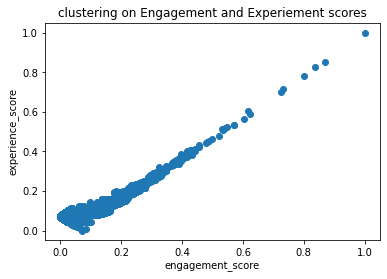

In [64]:
# plot the cluster
plt.scatter(x[:,0],x[:,1])
plt.xlabel('engagement_score')
plt.ylabel('experience_score')
plt.title('clustering on Engagement and Experiement scores')
plt.show()

In [65]:
df

,MSISDN/NUMBER,engagement_score,experience_score,satisfaction_score
0,3.360100e+10,0.021876,0.046740,0.045246
1,3.360100e+10,0.022180,0.097426,0.070893
2,3.360100e+10,0.002841,0.066187,0.035934
3,3.360101e+10,0.004291,0.078346,0.043464
4,3.360101e+10,0.069399,0.045172,0.091985
...,...,...,...,...
106851,3.379000e+10,0.010920,0.057860,0.039850
106852,3.379000e+10,0.000972,0.074321,0.038132
106853,3.197020e+12,0.029137,0.095688,0.076981
106854,3.370000e+14,0.004308,0.066433,0.037525


#### task 4.5  
##### aggregate avg satisfaction and experience score per cluster


In [66]:
df['cluster']=kmeans.labels_
df['cluster'].value_counts()

0    101272
1      5584
Name: cluster, dtype: int64

In [67]:
result=df.groupby('cluster').mean()
result

,MSISDN/NUMBER,engagement_score,experience_score,satisfaction_score
cluster,,,,
0,4.574539e+10,0.020635,0.071879,0.056575
1,3.367712e+10,0.147086,0.120698,0.207435


# Task 4.6 - Export your final table containing all user id + engagement, experience & satisfaction 
scores in your local MySQL database. Report a screenshot of a select query output on the 
exported table.

In [69]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [70]:
import numpy as np
import pandas as pd
import mysql.connector

In [77]:
df.to_csv('Result_table.csv',index=False)

In [78]:
data=pd.read_csv('Result_table.csv')

In [79]:
data.head()

,MSISDN/NUMBER,engagement_score,experience_score,satisfaction_score,cluster
0,3.360100e+10,0.021876,0.046740,0.045246,0
1,3.360100e+10,0.022180,0.097426,0.070893,0
2,3.360100e+10,0.002841,0.066187,0.035934,0
3,3.360101e+10,0.004291,0.078346,0.043464,0
4,3.360101e+10,0.069399,0.045172,0.091985,0


In [ ]:
# establish  a connection